# Project Customer churn data.

### Importing libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings

from glob import glob
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore")

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # removing the the customer ID column which numbers the whole data set
    df.drop(columns=['CustomerID'], inplace=True)
    
    # converting Churn column from float to int
    df['Churn'] = (df['Churn']>0).astype(int)
    
    return df

In [6]:
files = glob("customer_churn_dataset-*.csv")
print(files)

['C:\\Users\\Gbest\\Desktop\\customer_churn_dataset-master-1.csv', 'C:\\Users\\Gbest\\Desktop\\customer_churn_dataset-master-2.csv']


In [7]:
frame = []
for file in files:
    df = wrangle(file)
    frame.append(df)

In [8]:
df = pd.concat(frame, ignore_index=True)
print(df.shape)
print(df.info())
df.head()

(505207, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505207 non-null  int32  
dtypes: float64(7), int32(1), object(3)
memory usage: 40.5+ MB
None


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1


**Exploratory Data Analysis**

In [9]:
df["Total Spend"].sum()

313264481.71999997

 The overall amount been transacted by customers annually is over $300 million.

In [10]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [11]:
mask_female = df["Gender"] == "Female"
print(df[mask_female].shape)
df[mask_female]

(224933, 11)


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1
6,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1
7,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...
505197,48.0,Female,36.0,22.0,4.0,22.0,Premium,Annual,342.0,9.0,1
505198,26.0,Female,54.0,24.0,2.0,21.0,Basic,Annual,165.0,23.0,1
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1
505205,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1


In [12]:
df[mask_female]["Total Spend"].sum()

135235349.92

Females transaction is **$135,235,349** anually.

In [13]:
mask_male = df["Gender"] == "Male"
print(df[mask_male].shape)
df[mask_male]

(280273, 11)


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1
5,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1
8,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1
10,29.0,Male,18.0,9.0,0.0,30.0,Premium,Quarterly,930.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...
505199,64.0,Male,30.0,27.0,9.0,28.0,Premium,Annual,884.0,21.0,1
505200,51.0,Male,47.0,17.0,10.0,26.0,Basic,Annual,544.0,24.0,1
505201,45.0,Male,3.0,1.0,5.0,11.0,Standard,Annual,218.0,15.0,1
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1


In [14]:
df[mask_male]["Total Spend"].sum()

178029131.79999998

In [15]:
df['Age'].unique()

array([30., 65., 55., 58., 23., 51., 39., 64., 29., 52., 22., 48., 24.,
       49., 19., 47., 42., 57., 27., 59., 21., 60., 35., 18., 56., 20.,
       63., 25., 28., 32., 38., 37., 31., 53., 41., 33., 26., 36., 44.,
       34., 61., 40., 45., 46., 54., 43., 50., 62., nan])

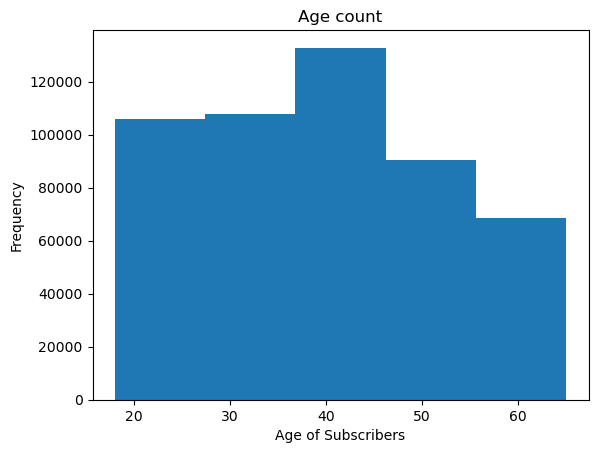

In [16]:
plt.hist(df['Age'], bins=5)
plt.xlabel('Age of Subscribers')
plt.ylabel('Frequency')
plt.title('Age count');

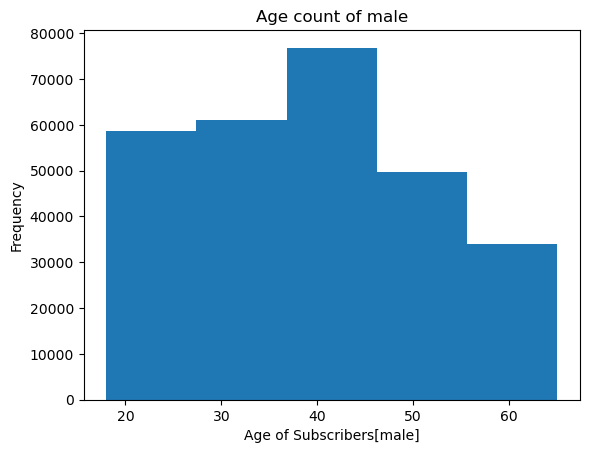

In [17]:
plt.hist(df[mask_male]['Age'], bins=5)
plt.xlabel('Age of Subscribers[male]')
plt.ylabel('Frequency')
plt.title('Age count of male');

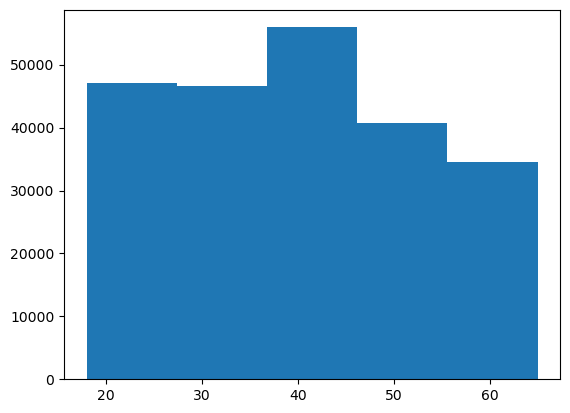

In [18]:
plt.hist(df[mask_female]['Age'], bins=5);

In [19]:
df['Churn'] = (df['Churn']>0).astype(int)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1
505204,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1
505205,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1


In [20]:
df['Churn'].value_counts(normalize=True)

1    0.555202
0    0.444798
Name: Churn, dtype: float64

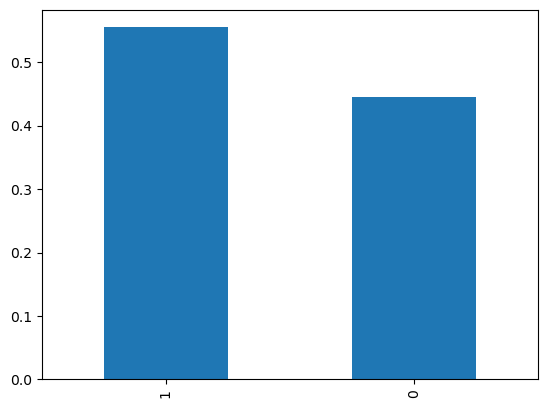

In [21]:
df['Churn'].value_counts(normalize=True).plot(kind="bar");

### Splitting the Data.

In [22]:
target = 'Churn'

y = df[target]
X= df.drop(columns=[target])

y

0         1
1         1
2         1
3         1
4         1
         ..
505202    1
505203    1
505204    1
505205    1
505206    1
Name: Churn, Length: 505207, dtype: int32

In [23]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0
...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0
505204,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0
505205,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (404165, 10)
y_train: (404165,)
X_test: (101042, 10)
y_test: (101042,)


### Setting Baseline

In [25]:
acc_baseline = y.value_counts(normalize=True).max()
acc_baseline

0.5552021250695259

### building and Training the model.

In [26]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    LogisticRegression()
).fit(X_train, y_train)

In [27]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("acc train:", acc_train.round(4))
print("acc test:", acc_test.round(4))

acc train: 0.8318
acc test: 0.8329


as we can see both the training and test set beat the baseline, and the test set did a little bit better than the training set.

### communicating the result

In [28]:
coefficient = model.named_steps["logisticregression"].coef_[0]
feature = model.named_steps["onehotencoder"].get_feature_names()

In [31]:
feat_imp = pd.Series(np.exp(coefficient), feature).sort_values()
feat_imp

Gender_Male                   0.715482
Contract Length_Quarterly     0.758068
Contract Length_Annual        0.764321
Subscription Type_Premium     0.960568
Subscription Type_Standard    0.965420
Usage Frequency               0.983671
Total Spend                   0.995798
Tenure                        0.998302
Contract Length_nan           0.999980
Gender_nan                    0.999980
Subscription Type_nan         0.999980
Age                           1.007177
Subscription Type_Basic       1.008653
Last Interaction              1.021793
Payment Delay                 1.111696
Gender_Female                 1.307337
Contract Length_Monthly       1.614367
Support Calls                 1.631716
dtype: float64

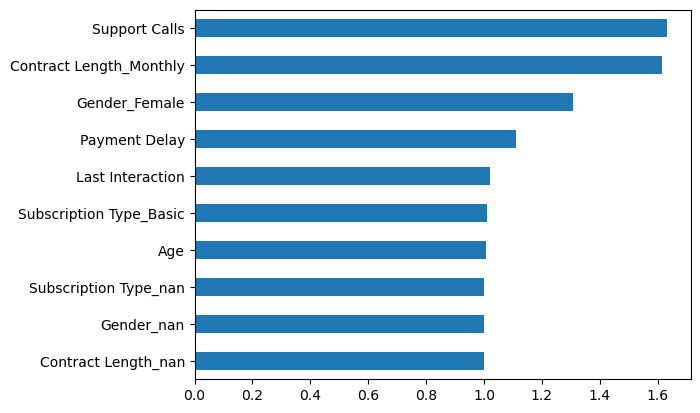

In [33]:
feat_imp.tail(10).sort_values(key=abs).plot(kind="barh");

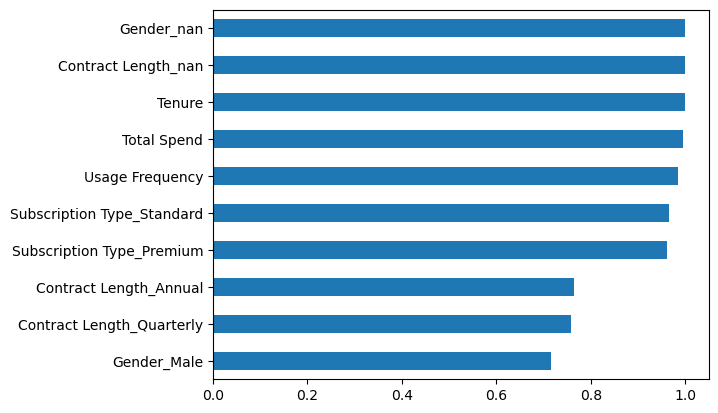

In [35]:
feat_imp.head(10).sort_values(key=abs).plot(kind="barh");